In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv("vgsales.csv")

### CHECK

In [80]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [81]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

#### if duplicate/null values exist

In [82]:
df.duplicated().values.any()

False

In [83]:
pd.isnull(df).any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

#### Dropping columns with missing value rate higher than threshold
#### Dropping rows with missing value rate higher than threshold


In [84]:
threshold = 0.7
df = df[df.columns[df.isnull().mean() < threshold]]
df = df.loc[df.isnull().mean(axis=1) < threshold]

##### adding a column of total sales

In [85]:
df['Total_sales'] = df['NA_Sales'] + df['Other_Sales'] + df['Global_Sales'] + df['EU_Sales'] + df['JP_Sales']

#### Dropping the outlier rows with standard deviation

In [86]:
factor = 3
upper = df['Total_sales'].mean () + df['Total_sales'].std () * factor
lower= df['Total_sales'].mean () - df['Total_sales'].std () * factor

df = df[(df['Total_sales'] < upper) & (df['Total_sales'] > lower)]

#### game with the lowest rank in each year

In [87]:
df.groupby('Year').agg(lambda x: x.value_counts().index[0])

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_sales
Year,,,,,,,,,,,
1980.0,259,Asteroids,2600,Misc,Activision,4.00,0.02,0.00,0.01,4.31,8.62
1981.0,240,Pitfall!,2600,Action,Atari,0.21,0.02,0.00,0.00,0.22,0.44
1982.0,1117,Dig Dug,2600,Action,Atari,0.58,0.03,0.00,0.01,0.50,1.08
1983.0,422,Baseball,2600,Action,Nintendo,0.51,0.02,0.00,0.00,3.20,6.40
1984.0,278,Excitebike,NES,Racing,Nintendo,0.00,0.00,1.57,0.00,1.52,3.04
1985.0,375,Kung Fu,NES,Puzzle,Nintendo,0.00,0.00,0.00,0.00,3.50,7.00
1986.0,453,World Class Track Meet,NES,Platform,Nintendo,0.00,0.00,0.00,0.00,1.20,2.40
1987.0,252,Zelda II: The Adventure of Link,NES,Sports,Nintendo,0.45,0.00,0.00,0.00,4.38,8.76
1988.0,313,Dragon Warrior III,NES,Role-Playing,Nintendo,0.00,0.00,0.00,0.00,3.87,7.74


#### Game with the lowest rank in each genre

In [88]:
data=df.groupby('Genre').agg(lambda x: x.value_counts().index[0])
data.head

<bound method NDFrame.head of               Rank                                               Name  \
Genre                                                                   
Action         186                                        Ratatouille   
Adventure      219                       The Walking Dead: Season One   
Fighting       204                                      WWE All Stars   
Misc           196                                           Monopoly   
Platform       184                              Skylanders SWAP Force   
Puzzle         216                                        Bejeweled 3   
Racing         214                        Need for Speed: Most Wanted   
Role-Playing   182                          Marvel: Ultimate Alliance   
Shooter        191  Transformers: Revenge of the Fallen (XBox 360,...   
Simulation     189                                         The Sims 2   
Sports         190                                      Madden NFL 07   
Strategy       205   

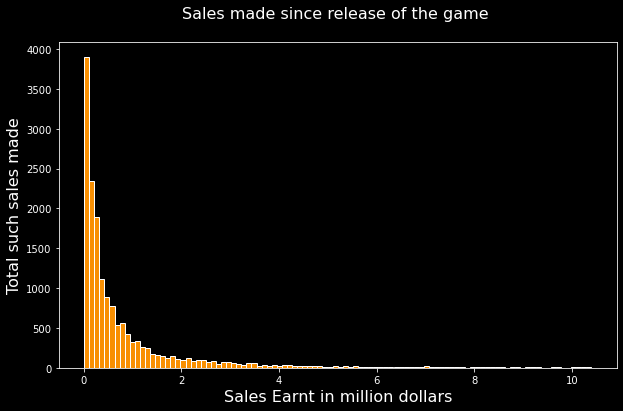

In [89]:
plt.figure(figsize=(10,6))
plt.hist(df.Total_sales,bins=100 ,ec = 'white',
         color = '#f88f01')
plt.xlabel('Sales Earnt in million dollars', fontsize=16)
plt.ylabel('Total such sales made', fontsize=16)
plt.title('Sales made since release of the game \n', fontsize=16)
plt.show()

C:\Users\mohmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


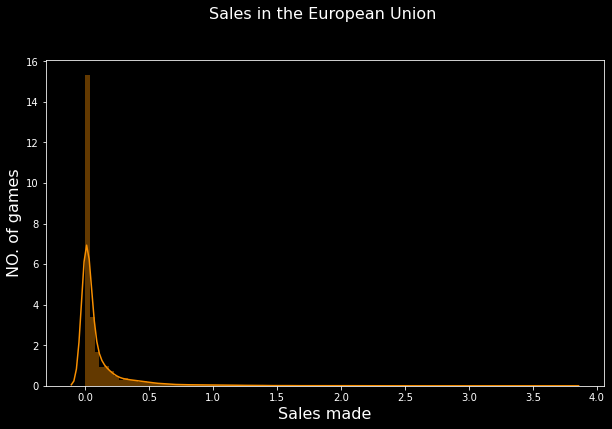

In [90]:
plt.figure(figsize=(10, 6))
sns.distplot(df.EU_Sales, bins = 100, color = '#f88f01', hist = True)
plt.style.use('dark_background')
plt.xlabel('Sales made', fontsize=16)
plt.ylabel('NO. of games', fontsize=16)
plt.title('Sales in the European Union \n\n', fontsize=16)
plt.show()

In [91]:
df.Publisher.unique().shape

(579,)

### Grouping sales in the NA by Publishers and plotting their sum

In [92]:
dfp=df.groupby('Publisher')['NA_Sales'].sum()

In [93]:
dfp.head()

Publisher
10TACLE Studios                 0.07
1C Company                      0.01
20th Century Fox Video Games    1.82
2D Boy                          0.00
3DO                             6.48
Name: NA_Sales, dtype: float64

In [94]:
dfp.tail()

Publisher
id Software             0.02
imageepoch Inc.         0.00
inXile Entertainment    0.02
mixi, Inc               0.00
responDESIGN            0.09
Name: NA_Sales, dtype: float64

In [95]:
dfp.shape

(578,)

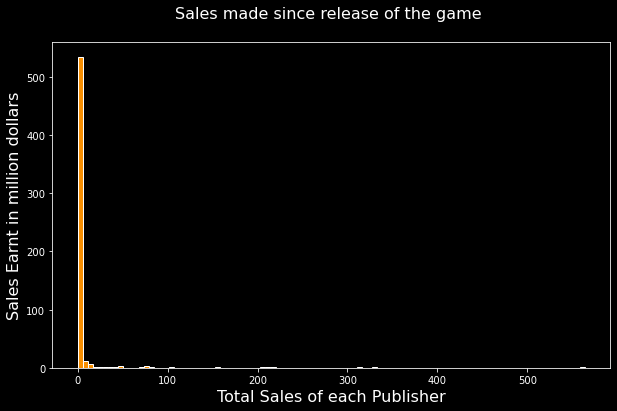

In [96]:
plt.figure(figsize=(10,6))
plt.hist(dfp,bins=100 ,ec = 'white',
         color = '#f88f01')
plt.xlabel('Total Sales of each Publisher', fontsize=16)
plt.ylabel('Sales Earnt in million dollars', fontsize=16)
plt.title('Sales made since release of the game \n', fontsize=16)
plt.show()

### Total games produced by each publisher

In [97]:
freq = df.Publisher.value_counts()
print(freq)

Electronic Arts                 1337
Activision                       956
Namco Bandai Games               932
Ubisoft                          912
Konami Digital Entertainment     829
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64


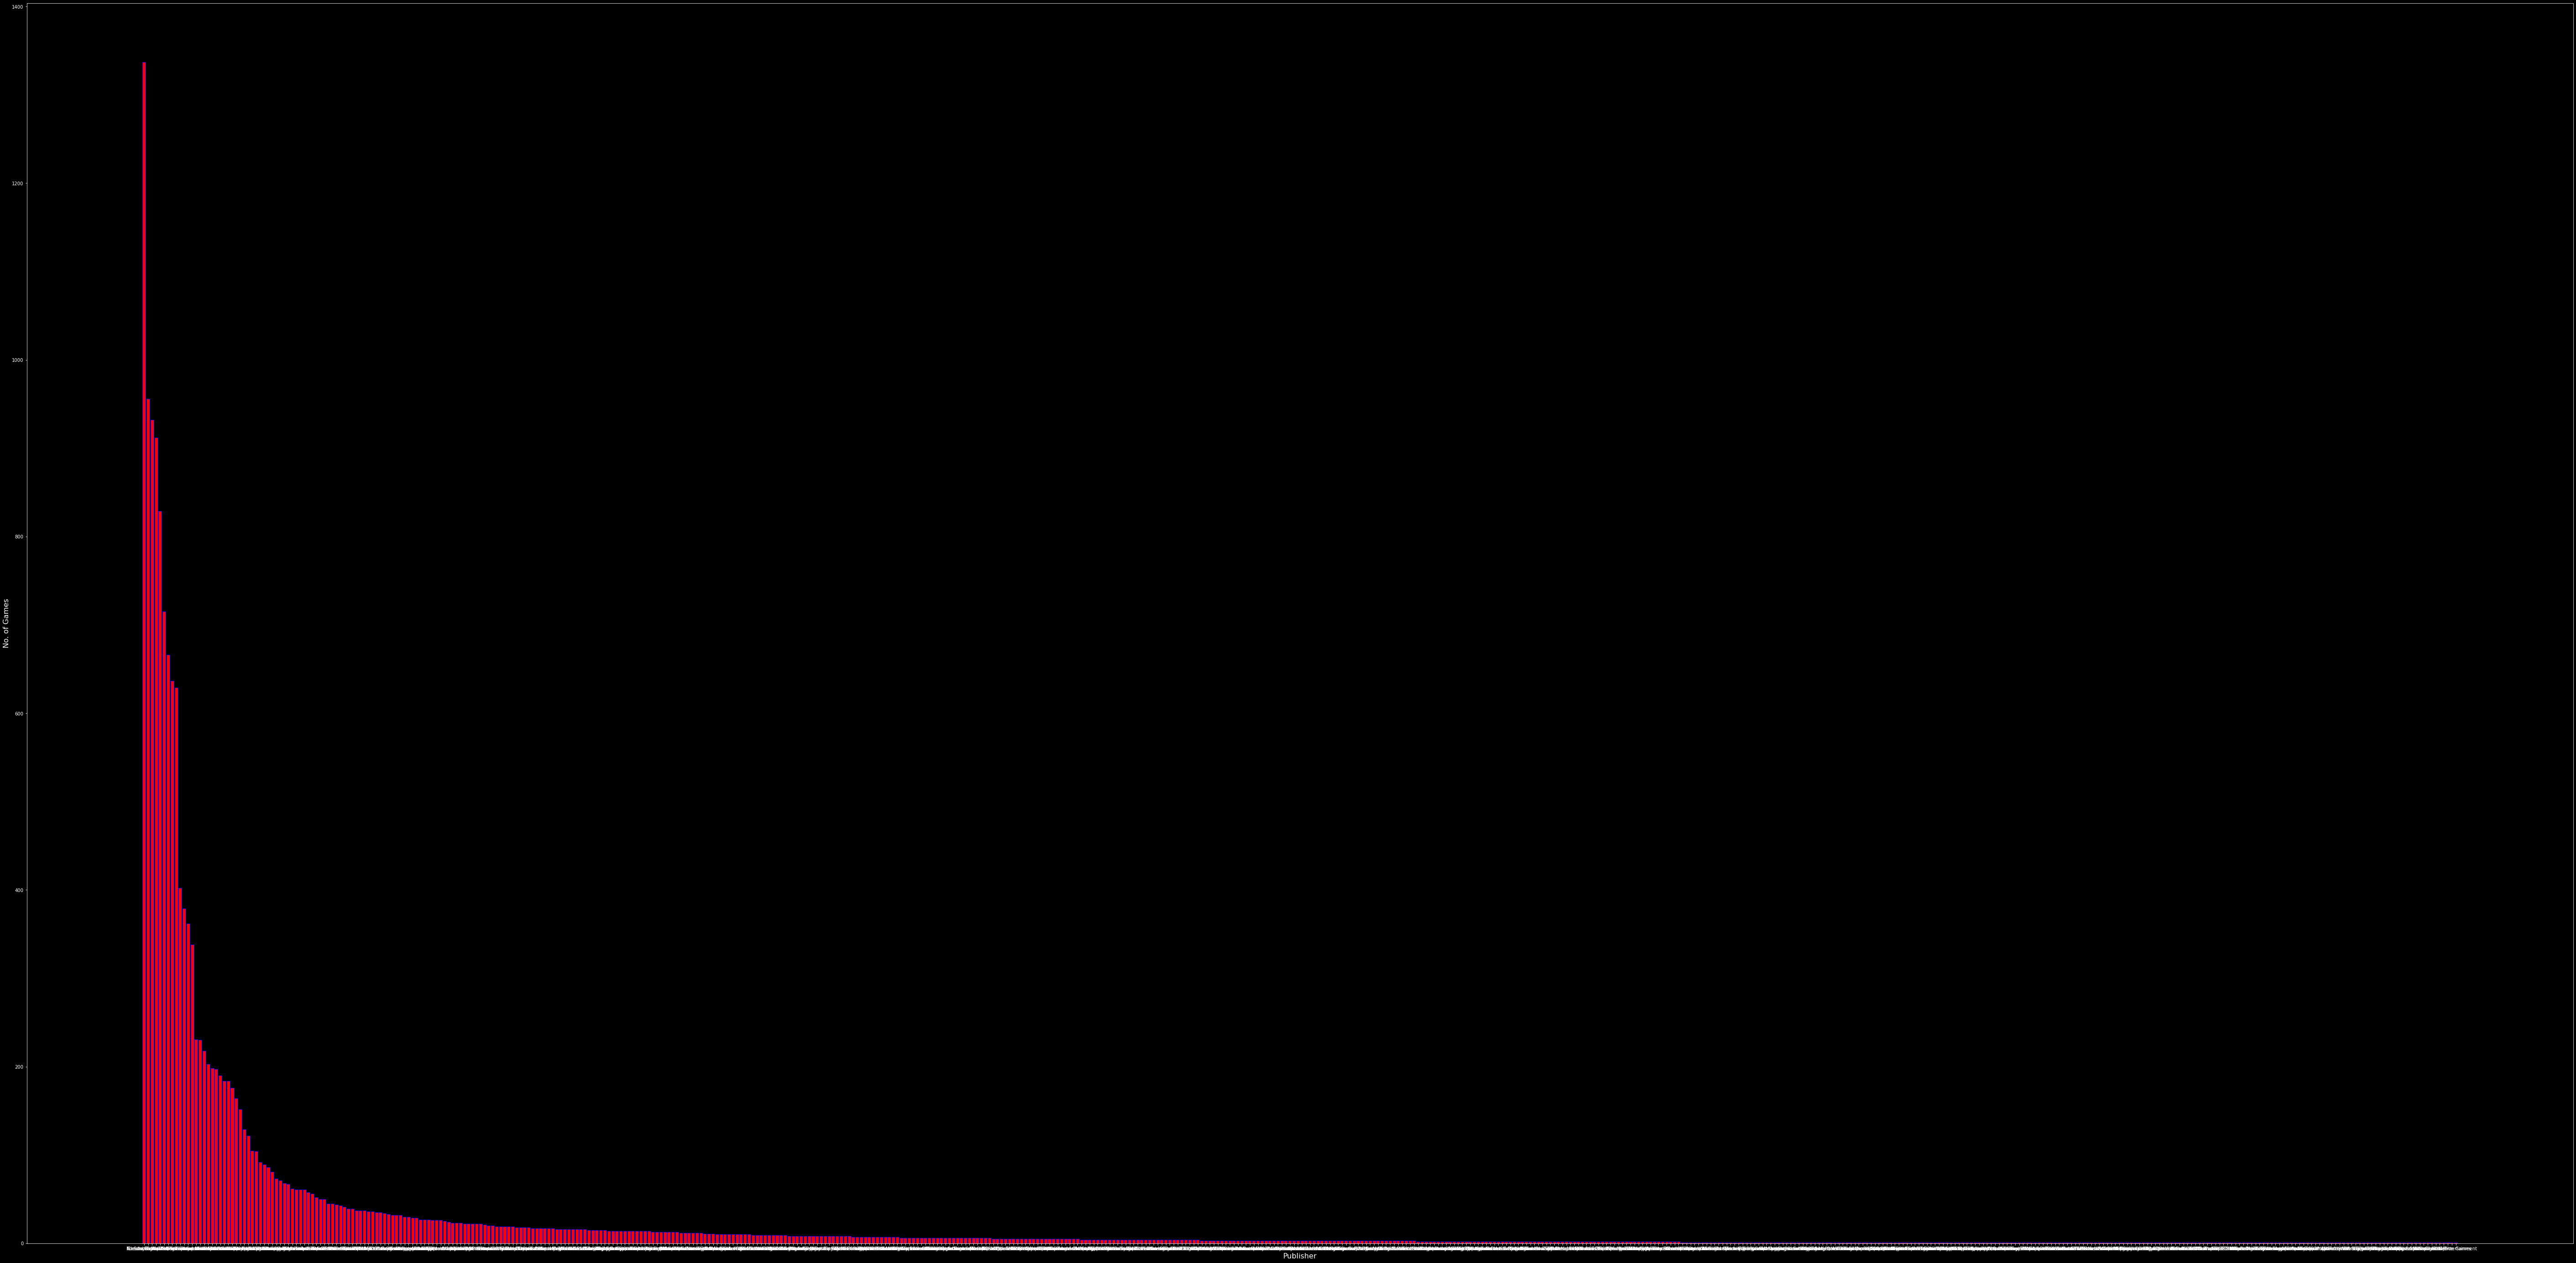

In [98]:
freq = df.Publisher.value_counts()
plt.figure(figsize=(100,50))
plt.bar(freq.index, height = freq,ec='blue',color='red')
plt.xlabel('Publisher', fontsize=16)
plt.ylabel('No. of Games', fontsize=16)
plt.ylabel('No. of Games', fontsize=16)
plt.show()

### Release Year vs Total Sales

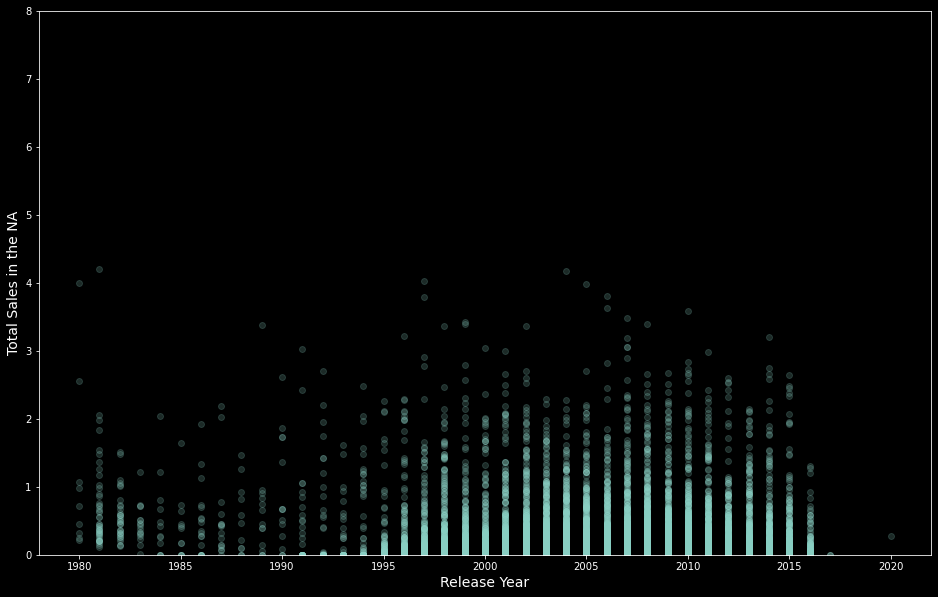

In [99]:
plt.figure(figsize=(16, 10))
plt.scatter(x= df['Year'], y=df['NA_Sales'], alpha=0.2)
plt.ylim(0, 8)
plt.style.use('dark_background')
plt.xlabel('Release Year', fontsize = 14)
plt.ylabel('Total Sales in the NA', fontsize = 14)
plt.show()

### Genre vs Global Sales , Avg Global Sales

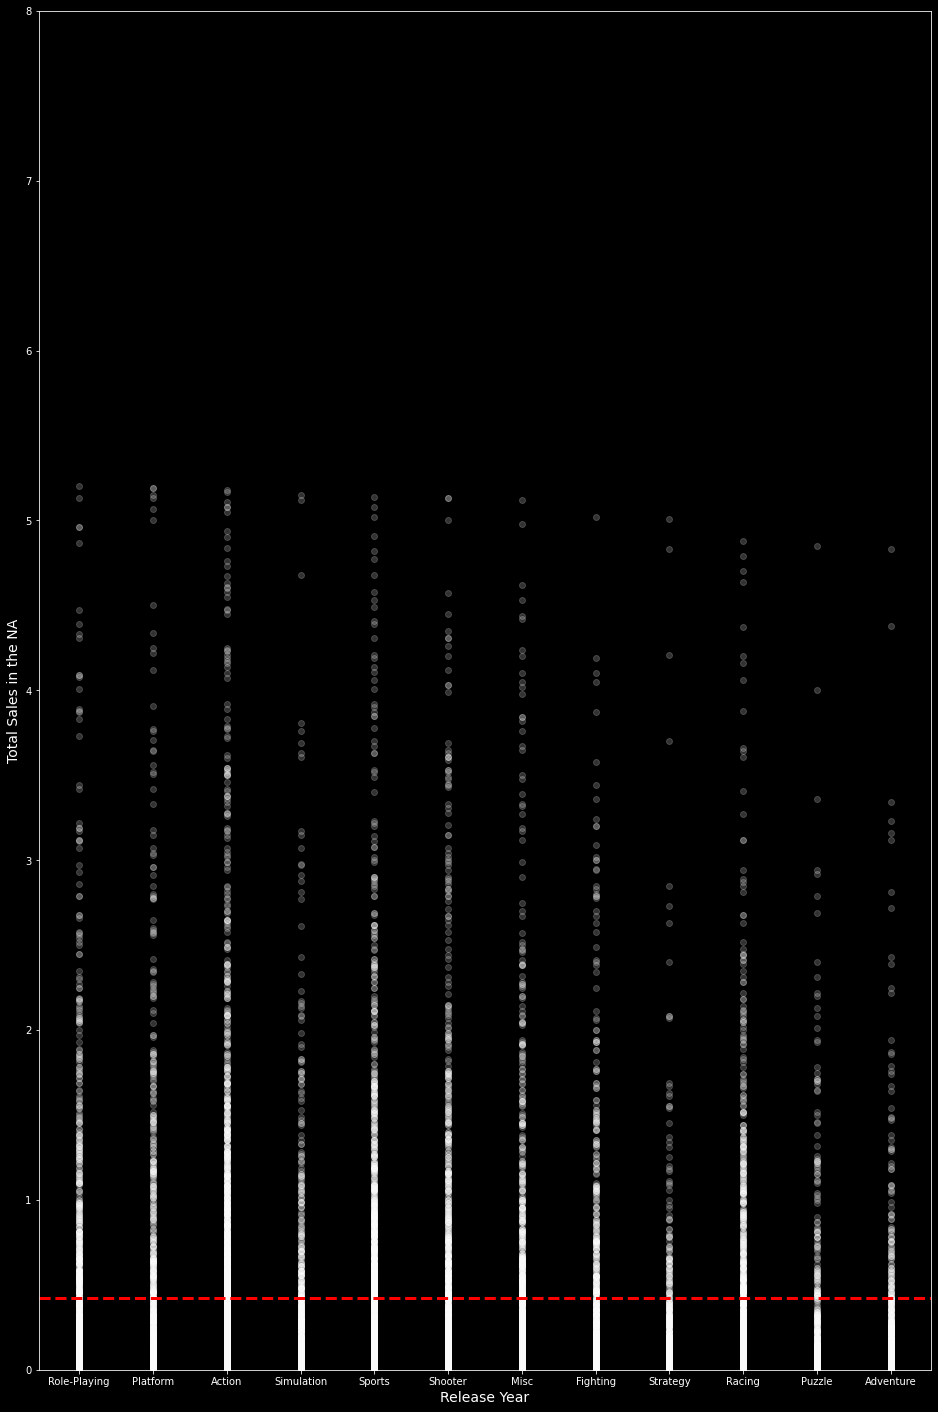

In [100]:
plt.figure(figsize=(16, 25))
plt.scatter(x= df['Genre'], y=df['Global_Sales'], alpha=0.2, color='white')
plt.ylim(0, 8)
plt.style.use('dark_background')
plt.xlabel('Release Year', fontsize = 14)
plt.ylabel('Total Sales in the NA', fontsize = 14)
plt.axhline(df['Global_Sales'].mean(), color='red',
            linestyle='dashed', linewidth=3, 
            label='Average Global Sale')
plt.show()

#### Relation of sales with year of release and genre ( Popularity of diff genres in diff years )

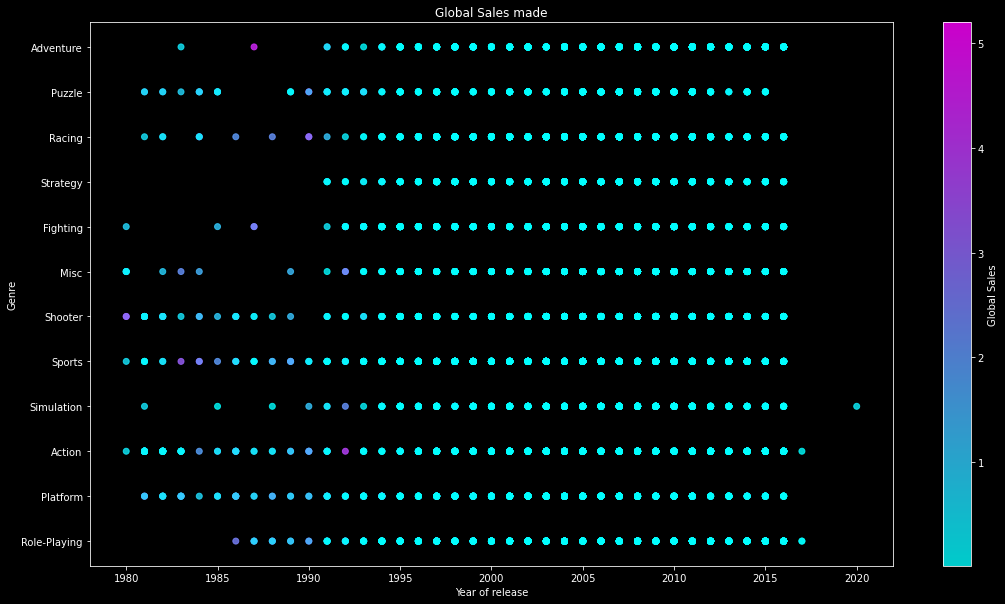

In [101]:
plt.figure(figsize=(18,10))
plt.scatter(df['Year'],df['Genre'],c=df['Global_Sales'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Global Sales")
plt.title('Global Sales made')
plt.xlabel('Year of release')
plt.ylabel('Genre')
plt.show()

In [102]:
df1 = df.pd(df.Total_sales, columns=['Other_Sales','Global_Sales'])
df1.plot.area();

AttributeError: 'DataFrame' object has no attribute 'pd'

### Pie chart of sales in JP by genre

In [112]:
dfx=df.groupby('Genre')['JP_Sales'].sum()

<AxesSubplot:ylabel='JP_Sales'>

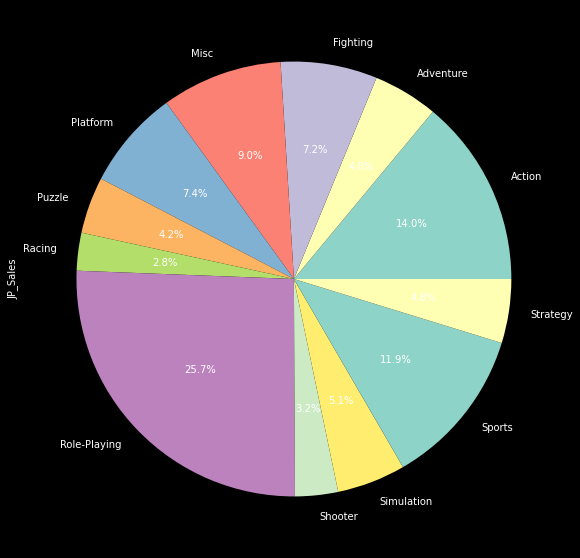

In [115]:
dfx.plot(kind='pie', y='Sales',autopct='%1.1f%%',figsize=(15,10))